In [1]:
!head analyses/Pg_val_destrand.10x.bedgraph

PGA_scaffold1__77_contigs__length_89643857 53 54 3.125
PGA_scaffold1__77_contigs__length_89643857 71 72 2.77777777777778
PGA_scaffold1__77_contigs__length_89643857 95 96 2.0408
PGA_scaffold1__77_contigs__length_89643857 118 119 0.0000
PGA_scaffold1__77_contigs__length_89643857 192 193 0.0000
PGA_scaffold1__77_contigs__length_89643857 201 202 0.0000
PGA_scaffold1__77_contigs__length_89643857 208 209 0.0000
PGA_scaffold1__77_contigs__length_89643857 212 213 0.0000
PGA_scaffold1__77_contigs__length_89643857 220 221 0.0000
PGA_scaffold1__77_contigs__length_89643857 237 238 1.3158


In [2]:
#If percent methylation is greater or equal to 50, then save the loci information
!awk '{if ($4 >= 50) { print $1, $2, $3, $4 }}' analyses/Pg_val_destrand.10x.bedgraph \
> analyses/Pg_val_destrand.10x.50p.bedgraph

In [3]:
!head analyses/Pg_val_destrand.10x.50p.bedgraph

PGA_scaffold1__77_contigs__length_89643857 11797 11798 50.0000
PGA_scaffold1__77_contigs__length_89643857 11838 11839 50.0000
PGA_scaffold1__77_contigs__length_89643857 11843 11844 50.0000
PGA_scaffold1__77_contigs__length_89643857 11846 11847 50.0000
PGA_scaffold1__77_contigs__length_89643857 11851 11852 55.5556
PGA_scaffold1__77_contigs__length_89643857 12029 12030 56.2500
PGA_scaffold1__77_contigs__length_89643857 51414 51415 56.8345
PGA_scaffold1__77_contigs__length_89643857 51426 51427 58.3333
PGA_scaffold1__77_contigs__length_89643857 51470 51471 55.0725
PGA_scaffold1__77_contigs__length_89643857 51563 51564 77.0833


In [4]:
%%bash
awk '{if ($4 < 50) { print $1, $2, $3, $4}}' analyses/Pg_val_destrand.10x.bedgraph \
| awk '{if ($4 > 0) { print $1, $2, $3, $4 }}' \
> analyses/Pg_val_destrand.10x.sparse.bedgraph

In [5]:
!head analyses/Pg_val_destrand.10x.sparse.bedgraph

PGA_scaffold1__77_contigs__length_89643857 53 54 3.125
PGA_scaffold1__77_contigs__length_89643857 71 72 2.77777777777778
PGA_scaffold1__77_contigs__length_89643857 95 96 2.0408
PGA_scaffold1__77_contigs__length_89643857 237 238 1.3158
PGA_scaffold1__77_contigs__length_89643857 564 565 2.2727
PGA_scaffold1__77_contigs__length_89643857 582 583 2.3256
PGA_scaffold1__77_contigs__length_89643857 617 618 15.3846
PGA_scaffold1__77_contigs__length_89643857 674 675 7.1429
PGA_scaffold1__77_contigs__length_89643857 680 681 6.2500
PGA_scaffold1__77_contigs__length_89643857 1165 1166 4.7619


In [8]:
!awk '{if ($4 == 0) { print $1, $2, $3, $4 }}' analyses/Pg_val_destrand.10x.bedgraph \
> analyses/Pg_val_destrand.10x.zero.bedgraph

In [9]:
!head analyses/Pg_val_destrand.10x.zero.bedgraph

PGA_scaffold1__77_contigs__length_89643857 118 119 0.0000
PGA_scaffold1__77_contigs__length_89643857 192 193 0.0000
PGA_scaffold1__77_contigs__length_89643857 201 202 0.0000
PGA_scaffold1__77_contigs__length_89643857 208 209 0.0000
PGA_scaffold1__77_contigs__length_89643857 212 213 0.0000
PGA_scaffold1__77_contigs__length_89643857 220 221 0.0000
PGA_scaffold1__77_contigs__length_89643857 394 395 0.0000
PGA_scaffold1__77_contigs__length_89643857 576 577 0.0000
PGA_scaffold1__77_contigs__length_89643857 656 657 0.0000
PGA_scaffold1__77_contigs__length_89643857 718 719 0.0000


In [10]:
!wc -l analyses/*val_destrand.10x*bedgraph

 3072742 analyses/Pg_val_destrand.10x.50p.bedgraph
 12086789 analyses/Pg_val_destrand.10x.bedgraph
 4036704 analyses/Pg_val_destrand.10x.sparse.bedgraph
 4977343 analyses/Pg_val_destrand.10x.zero.bedgraph
 24173578 total


In [21]:
4977343/12086789


0.4118002721814702

In [22]:
4036704/12086789


0.33397654248783526

In [23]:
3072742/12086789


0.25422318533069455

In [11]:
24173578-12086789


12086789

In [12]:
import pandas as pd

In [13]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

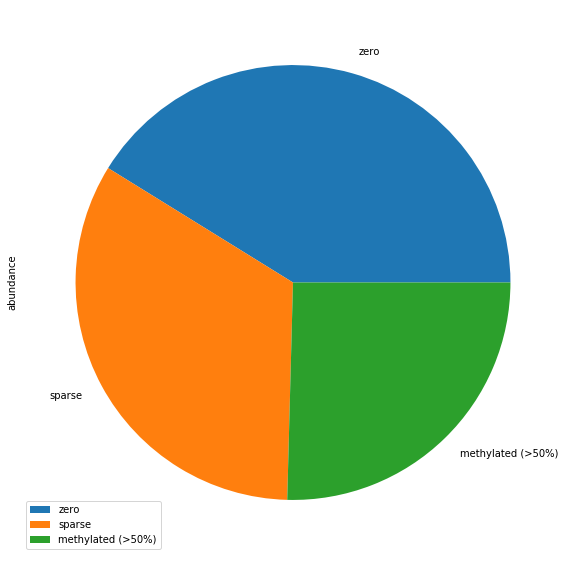

In [14]:
df = pd.DataFrame({'abundance': [4977343, 4036704 , 3072742],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['zero', 'sparse', 'methylated (>50%)'])
plot = df.plot.pie(y='abundance', figsize=(10, 10))

## Creating Beds of different mCpG bgraphs

In [15]:
!awk '{print $1"\t"$2"\t"$3}' analyses/Pg_val_destrand.10x.50p.bedgraph \
> analyses/Pg_val_destrand.10x.50p.bed

In [16]:
!head analyses/Pg_val_destrand.10x.50p.bed

PGA_scaffold1__77_contigs__length_89643857	11797	11798
PGA_scaffold1__77_contigs__length_89643857	11838	11839
PGA_scaffold1__77_contigs__length_89643857	11843	11844
PGA_scaffold1__77_contigs__length_89643857	11846	11847
PGA_scaffold1__77_contigs__length_89643857	11851	11852
PGA_scaffold1__77_contigs__length_89643857	12029	12030
PGA_scaffold1__77_contigs__length_89643857	51414	51415
PGA_scaffold1__77_contigs__length_89643857	51426	51427
PGA_scaffold1__77_contigs__length_89643857	51470	51471
PGA_scaffold1__77_contigs__length_89643857	51563	51564


In [17]:
!awk '{print $1"\t"$2"\t"$3}' analyses/Pg_val_destrand.10x.sparse.bedgraph \
> analyses/Pg_val_destrand.10x.sparse.bed

In [18]:
!awk '{print $1"\t"$2"\t"$3}' analyses/Pg_val_destrand.10x.zero.bedgraph \
> analyses/Pg_val_destrand.10x.zero.bed